In [2]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300

In [3]:
datadir = "../data/peak_picking_data_batchA/"

In [4]:
data = pd.read_csv(datadir + "peaks_f2.csv",index_col=0)
data

,mz,rt_start,rt_end,isotope,adduct,peak group,BatchA_pL_20648656_1.mzML,BatchA_pL_20662540_2.mzML,BatchA_pL_20709656_1.mzML,BatchA_pL_20833430_1.mzML,...,BatchA_pL_Blank_4.mzML,BatchA_pL_QC_01.mzML,BatchA_pL_QC_02.mzML,BatchA_pL_QC_03.mzML,BatchA_pL_QC_04.mzML,BatchA_pL_QC_05.mzML,BatchA_pL_QC_06.mzML,BatchA_pL_QC_07.mzML,BatchA_pL_QC_08.mzML,BatchA_pL_QC_09.mzML
1,50.160542,15.790267,15.844883,NaN,NaN,20,9248.892710,0.0,0.0,4538.847725,...,0.0,2761.085495,2153.579574,1938.483440,3945.930906,2599.844474,2439.268521,5894.607260,4804.468204,4718.194322
2,50.249579,17.273083,17.291300,NaN,NaN,14,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,50.344394,15.818367,15.873200,NaN,NaN,20,2681.479356,0.0,0.0,3714.912390,...,0.0,0.000000,0.000000,0.000000,1981.399435,0.000000,2474.157377,0.000000,0.000000,0.000000
4,50.394954,17.258118,17.273083,NaN,NaN,14,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,50.786824,16.354183,16.370783,NaN,NaN,3,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56444,1698.476473,23.751500,23.797450,NaN,NaN,7648,3799.231927,0.0,0.0,0.000000,...,0.0,2691.687550,2752.519914,2165.713674,1659.038882,2500.689245,1696.295489,2227.477189,2171.915612,2318.383433
56446,1698.521781,2.488217,2.488217,NaN,NaN,5233,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
56450,1699.036509,16.743200,16.805200,NaN,NaN,3888,192.003302,0.0,0.0,0.000000,...,0.0,133.854398,0.000000,0.000000,0.000000,0.000000,0.000000,572.239461,0.000000,0.000000
56451,1699.059279,14.951067,14.951067,NaN,NaN,14037,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
blanks = [x for x in data.columns.values if "lank" in x]
print(blanks)

['BatchA_pL_Blank_1.mzML', 'BatchA_pL_Blank_2.mzML', 'BatchA_pL_Blank_3.mzML', 'BatchA_pL_Blank_4.mzML']


In [6]:
qcs = [x for x in data.columns.values if "QC" in x]
print(qcs)

['BatchA_pL_QC_01.mzML', 'BatchA_pL_QC_02.mzML', 'BatchA_pL_QC_03.mzML', 'BatchA_pL_QC_04.mzML', 'BatchA_pL_QC_05.mzML', 'BatchA_pL_QC_06.mzML', 'BatchA_pL_QC_07.mzML', 'BatchA_pL_QC_08.mzML', 'BatchA_pL_QC_09.mzML']


In [7]:
individualSamples = [x for x in data.columns.values if ".mzML" in x and x not in qcs and x not in blanks]
individualSamples

['BatchA_pL_20648656_1.mzML',
 'BatchA_pL_20662540_2.mzML',
 'BatchA_pL_20709656_1.mzML',
 'BatchA_pL_20833430_1.mzML',
 'BatchA_pL_21170212_1.mzML',
 'BatchA_pL_21490883_1.mzML',
 'BatchA_pL_21804406_1.mzML',
 'BatchA_pL_22227995_1.mzML',
 'BatchA_pL_22389712_1.mzML',
 'BatchA_pL_22647044_1.mzML',
 'BatchA_pL_22691570_1.mzML',
 'BatchA_pL_23106800_1.mzML',
 'BatchA_pL_23189509_2.mzML',
 'BatchA_pL_23222896_1.mzML',
 'BatchA_pL_24301426_1.mzML',
 'BatchA_pL_24323800_1.mzML',
 'BatchA_pL_24538846_1.mzML',
 'BatchA_pL_25223405_1.mzML',
 'BatchA_pL_25294687_1.mzML',
 'BatchA_pL_25315590_1.mzML',
 'BatchA_pL_25454050_2.mzML',
 'BatchA_pL_25701699_1.mzML',
 'BatchA_pL_25829284_1.mzML',
 'BatchA_pL_26725979_1.mzML',
 'BatchA_pL_26808337_1.mzML',
 'BatchA_pL_26891507_1.mzML',
 'BatchA_pL_26971663_1.mzML',
 'BatchA_pL_27138651_1.mzML',
 'BatchA_pL_27141019_1.mzML',
 'BatchA_pL_27206234_1.mzML',
 'BatchA_pL_27231497_1.mzML',
 'BatchA_pL_27244581_1.mzML',
 'BatchA_pL_27297829_1.mzML',
 'BatchA_p

In [8]:
intensityCutoff = 10000
blankCutoff = 3
qcFeats = []
researchFeats = []
for index,row in data.iterrows():
    sampInt = np.mean(data.loc[index,individualSamples])
    sampMax = np.max(data.loc[index,individualSamples])
    blankInt = np.mean(data.loc[index,blanks])
    pooledInt = np.mean(data.loc[index,qcs])
    pooledMax = np.max(data.loc[index,qcs])
    if sampInt/blankInt > blankCutoff and sampMax > intensityCutoff: researchFeats.append(index)
    if pooledInt/blankInt > blankCutoff and pooledMax > intensityCutoff: qcFeats.append(index)
print(len(researchFeats),len(qcFeats))

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


7041 4317


([], [])

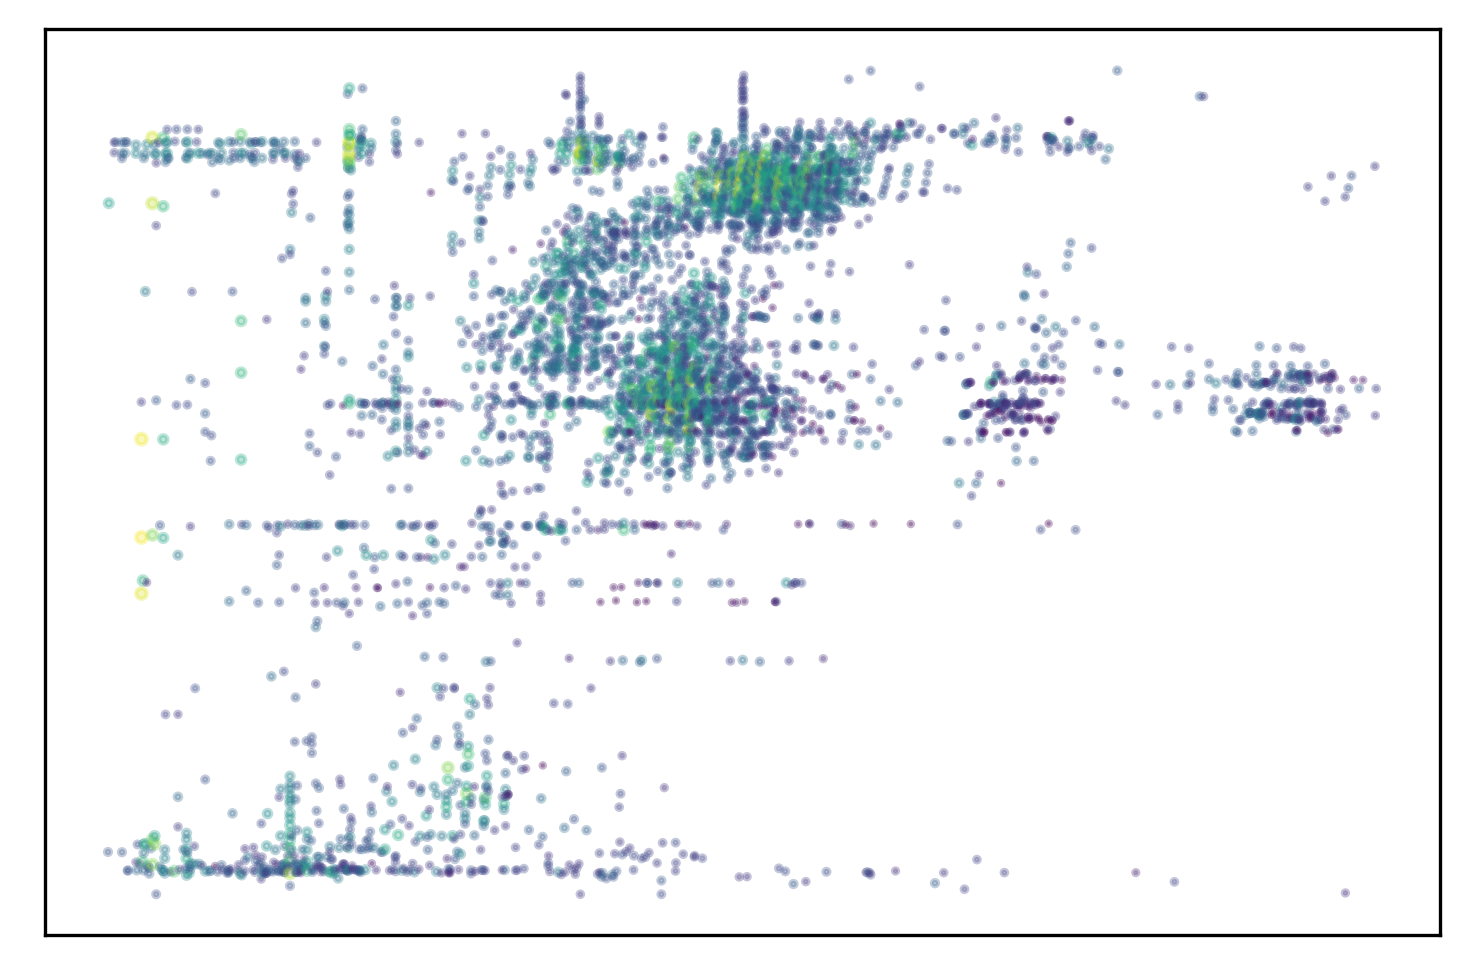

In [32]:
tmp = data.loc[qcFeats,qcs]
ints = [row.values.mean() for _,row in tmp.iterrows()]
mzs = [data.at[ind,"mz"] for ind in qcFeats]
rts = [data.at[ind,"rt_start"] for ind in qcFeats]
plt.scatter(mzs,rts,c=np.log2(ints),s=np.square(np.log2(ints))/100,alpha=0.3)
plt.xticks([],[])
plt.yticks([],[])

In [8]:
mysteryFeats = set(qcFeats) - set(researchFeats)
tmp = data.loc[mysteryFeats,:]
tmp.to_csv(datadir + "mystery_feats.csv")
tmp

,mz,rt_start,rt_end,isotope,adduct,peak group,BatchA_pL_20648656_1.mzML,BatchA_pL_20662540_2.mzML,BatchA_pL_20709656_1.mzML,BatchA_pL_20833430_1.mzML,...,BatchA_pL_Blank_4.mzML,BatchA_pL_QC_01.mzML,BatchA_pL_QC_02.mzML,BatchA_pL_QC_03.mzML,BatchA_pL_QC_04.mzML,BatchA_pL_QC_05.mzML,BatchA_pL_QC_06.mzML,BatchA_pL_QC_07.mzML,BatchA_pL_QC_08.mzML,BatchA_pL_QC_09.mzML
16896,632.394690,6.679550,6.803633,[2350][M]+,[M+H]+ 631.387,23629,1.328623e+04,4.584852e+02,1.832172e+03,2.045314e+03,...,0.000000e+00,9.280595e+03,1.307300e+04,8.664756e+03,1.214289e+04,1.211862e+04,1.110434e+04,1.173651e+04,1.117184e+04,1.058525e+04
20480,693.564134,19.311117,19.328150,[3080][M]+,[M+Na]+ 670.574,228,2.203957e+05,9.686499e+03,3.659112e+04,5.102831e+04,...,6.528379e+03,1.269383e+05,2.156989e+05,2.105177e+05,2.081008e+05,2.156940e+05,2.023252e+05,1.984402e+05,1.981095e+05,2.019103e+05
54787,1610.151902,17.244732,17.314551,[10384][M]2+,NaN,14,5.959688e+03,5.533714e+02,1.622002e+03,5.526173e+03,...,0.000000e+00,3.202894e+03,5.315184e+03,5.830811e+03,6.450192e+03,6.832782e+03,5.041020e+03,5.735583e+03,1.371864e+04,5.525437e+03
39433,1011.862131,26.698350,26.807883,[7105][M]+,[M+H]+ 1010.85,312,9.339236e+03,2.579074e+02,4.678609e+02,1.287155e+04,...,0.000000e+00,2.082307e+04,1.723011e+04,1.272930e+04,1.820206e+04,1.580535e+04,1.704683e+04,1.979690e+04,1.593129e+04,1.603611e+04
4618,281.247678,3.928517,4.104967,NaN,NaN,303,4.977784e+04,7.135956e+03,2.094906e+04,2.427402e+04,...,5.046718e+03,3.277852e+04,1.066601e+05,1.093334e+05,8.296878e+04,6.623618e+04,8.221224e+04,1.051903e+05,1.096722e+05,1.144702e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22515,730.164774,2.035433,2.127300,NaN,[M+Na]+ 707.174,155,6.298189e+03,0.000000e+00,2.246920e+03,3.565027e+03,...,2.447156e+02,7.315276e+03,7.495377e+03,1.011745e+04,9.084178e+03,9.158122e+03,8.617222e+03,7.691621e+03,9.470181e+03,5.418520e+03
19449,675.497424,18.453867,18.563667,[2852][M]+,NaN,13,1.350098e+04,1.131322e+03,9.425978e+02,0.000000e+00,...,4.959761e+02,1.980223e+04,2.361366e+04,2.440271e+04,2.158205e+04,2.180375e+04,2.143681e+04,1.981141e+04,2.080545e+04,1.909930e+04
36861,956.599220,0.958000,1.064900,[6553][M]+,NaN,446,6.138650e+02,3.643497e+03,2.330172e+04,4.850391e+02,...,1.958483e+03,3.993334e+03,2.946625e+03,2.075053e+03,1.332635e+03,1.166032e+03,2.057789e+04,1.980901e+04,1.428186e+04,0.000000e+00
510,102.127704,10.202067,10.417317,[19][M]+,NaN,39,6.620590e+07,1.174046e+07,1.379106e+07,2.210560e+07,...,8.931842e+06,6.465422e+07,6.470487e+07,6.392795e+07,2.331194e+07,2.377586e+07,6.482370e+07,2.286295e+07,6.056109e+07,2.423184e+07


7229


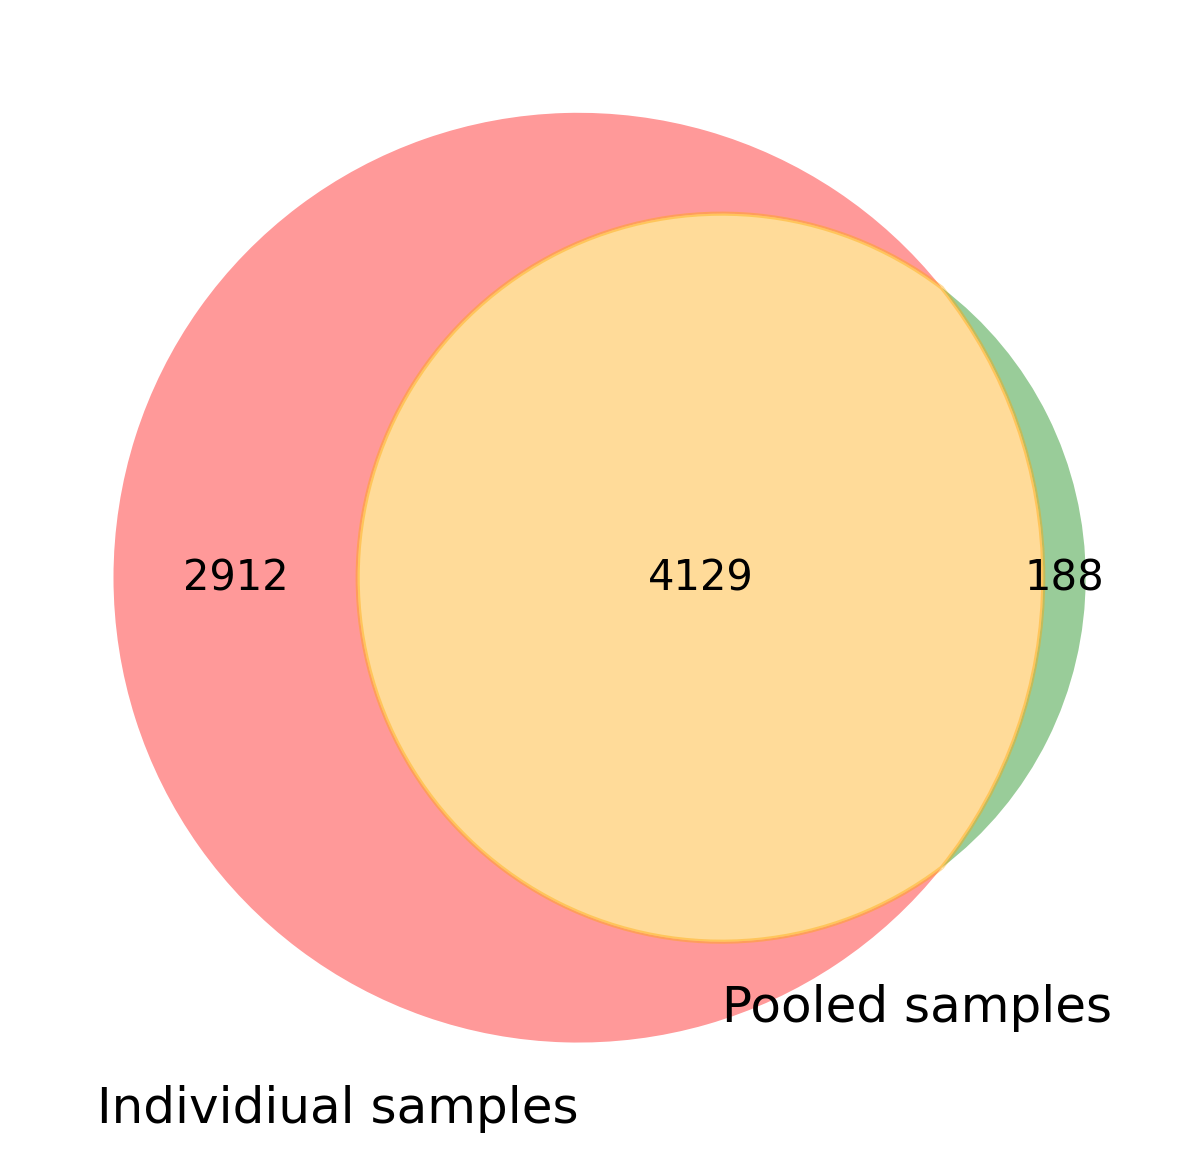

In [9]:
v = venn2([set(researchFeats),set(qcFeats)],set_labels=["Individiual samples","Pooled samples"],set_colors=("red","green"),alpha=.4)
v.get_patch_by_id('11').set_color('orange')
print(len(set(researchFeats).union(set(qcFeats))))
plt.tight_layout()
plt.savefig("../plots/feature_venn.png")

In [10]:
lostFeats = list(set(researchFeats)-set(qcFeats))
print(len(lostFeats))

2912


In [14]:
intensityCutoff = 10000
ints = []
fracs = []
cutoff = 0.7
numAboveCutoff = 0
for index in lostFeats:
    sampInts = data.loc[index,individualSamples].values
    frac = len([x for x in sampInts if x > intensityCutoff])/len(sampInts)
    if frac > cutoff:
        numAboveCutoff += 1
    fracs.append(len([x for x in sampInts if x > intensityCutoff])/len(sampInts))
    ints.append(np.mean([x for x in sampInts if x > intensityCutoff]))
print(numAboveCutoff/len(researchFeats))
print(numAboveCutoff)

0.004970884817497514
35


0.0995523872679045


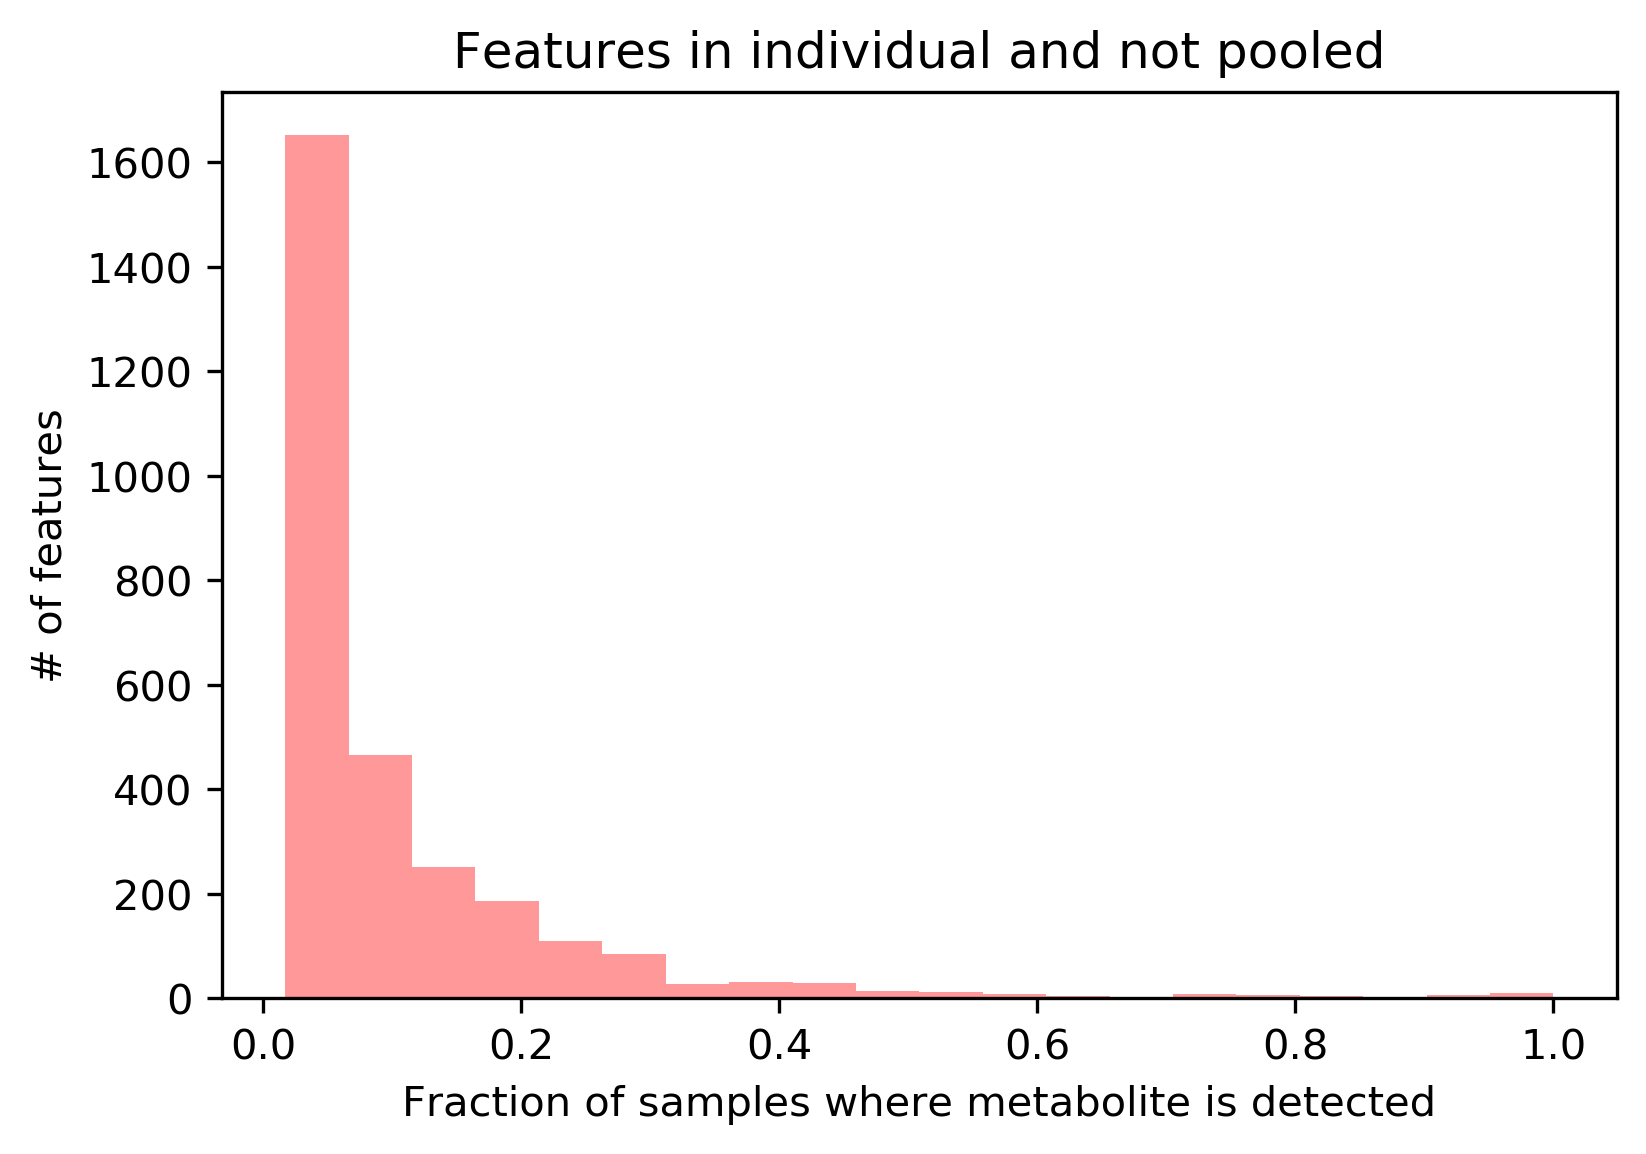

In [48]:
plt.hist(fracs,bins=20,color="red",alpha=.4)
plt.xlabel("Fraction of samples where metabolite is detected")
plt.ylabel("# of features")
plt.title("Features in individual and not pooled")
plt.savefig("../plots/histogram_detection_individual.png")
print(np.mean(fracs))

48289.38739529897


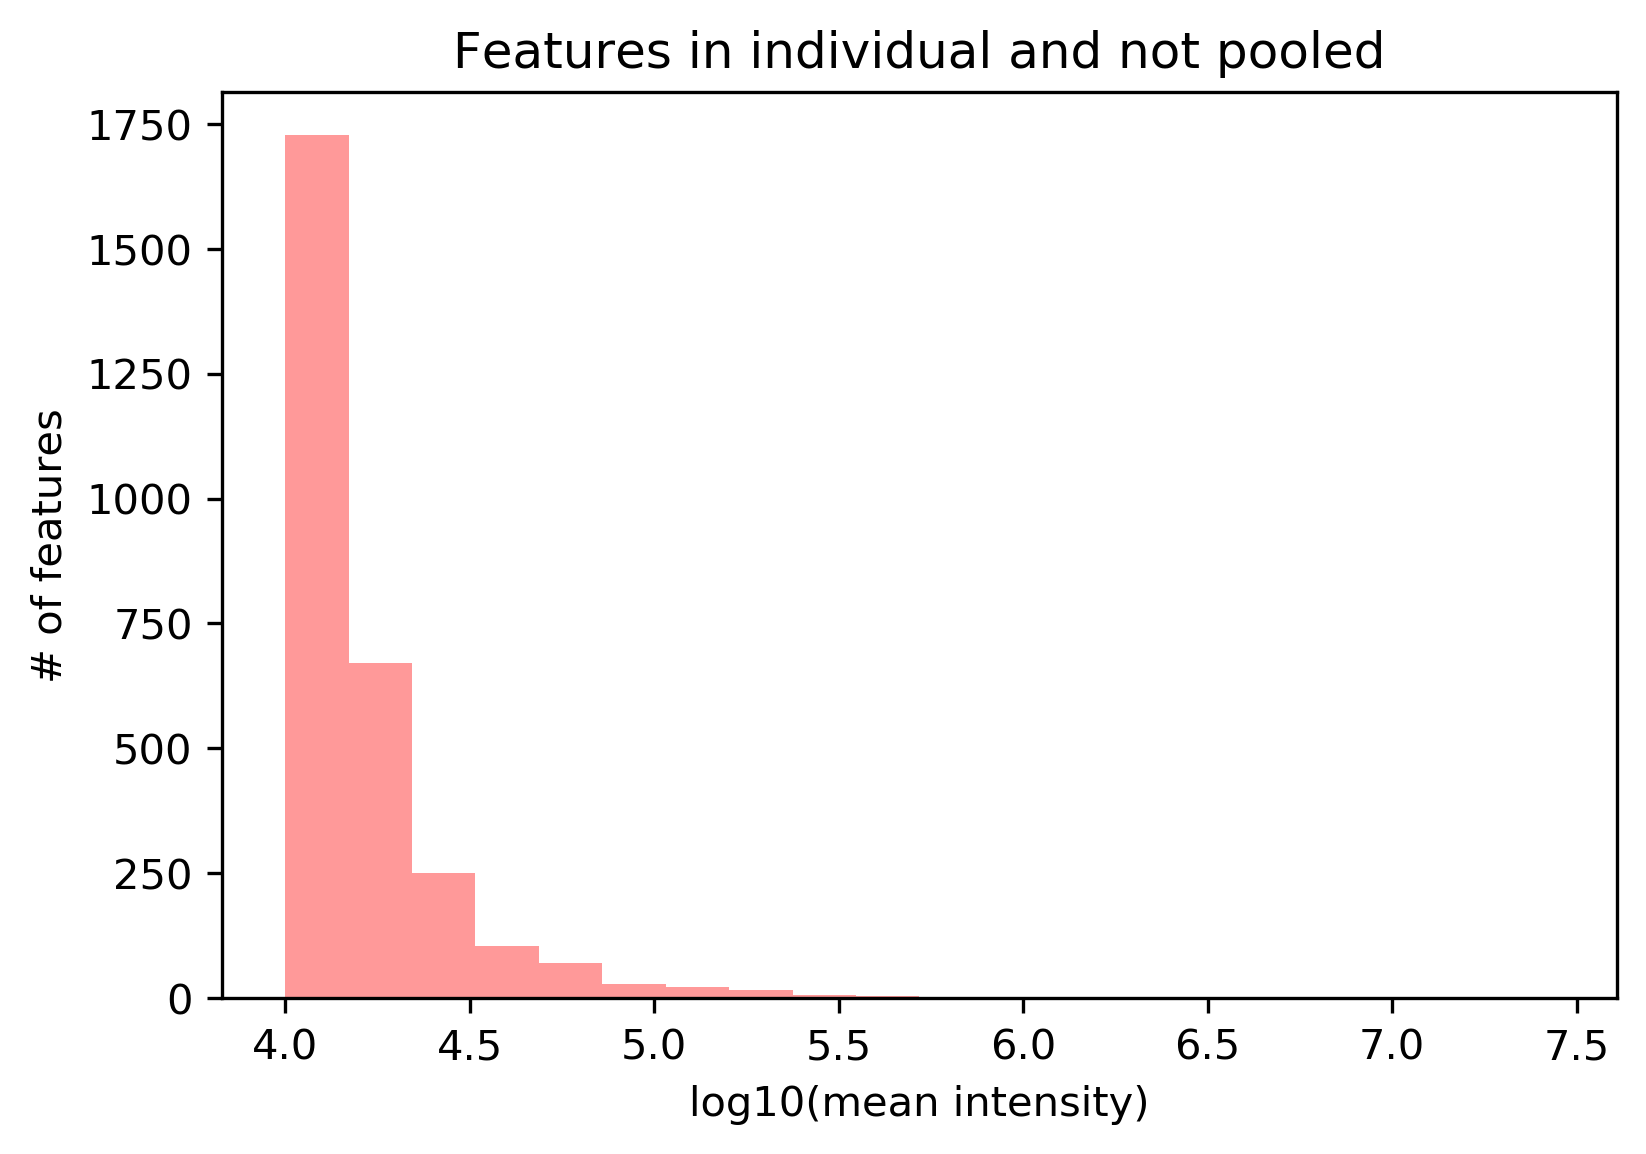

In [49]:
plt.hist(np.log10(ints),bins=20,color="red",alpha=.4)
plt.xlabel("log10(mean intensity)")
plt.ylabel("# of features")
plt.title("Features in individual and not pooled")
plt.savefig("../plots/histogram_intensity_individual.png")
print(np.mean(ints))

In [50]:
foundFeats = list(set(researchFeats).intersection(set(qcFeats)))
intensityCutoff = 10000
ints = []
fracs = []
for index in foundFeats:
    sampInts = data.loc[index,individualSamples].values
    fracs.append(len([x for x in sampInts if x > intensityCutoff])/len(sampInts))
    ints.append(np.mean([x for x in sampInts if x > intensityCutoff]))


0.6761176205309793
869


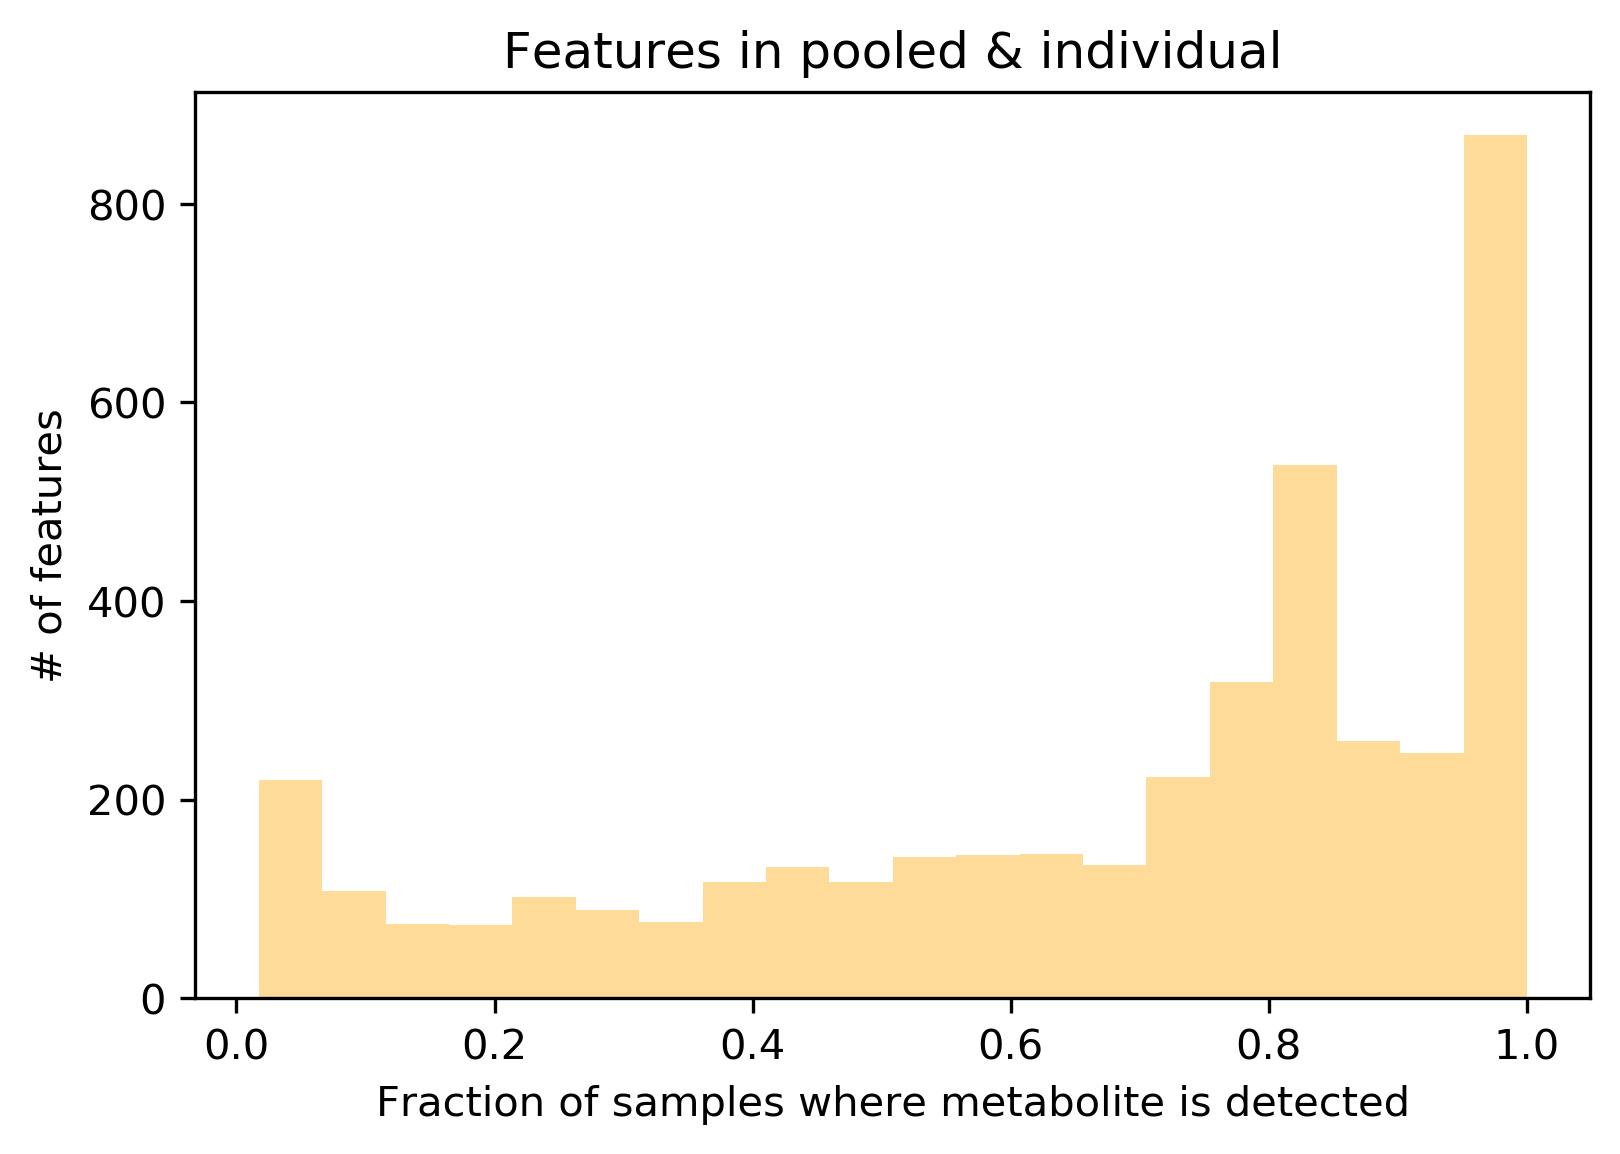

In [62]:
plt.hist(fracs,bins=20,color="orange",alpha=.4)
plt.xlabel("Fraction of samples where metabolite is detected")
plt.ylabel("# of features")
plt.title("Features in pooled & individual")
plt.savefig("../plots/histogram_feature_detection_pooled_individual.png")
print(np.mean(fracs))
print(len([x for x in fracs if x > 0.95]))

529529.0173696332


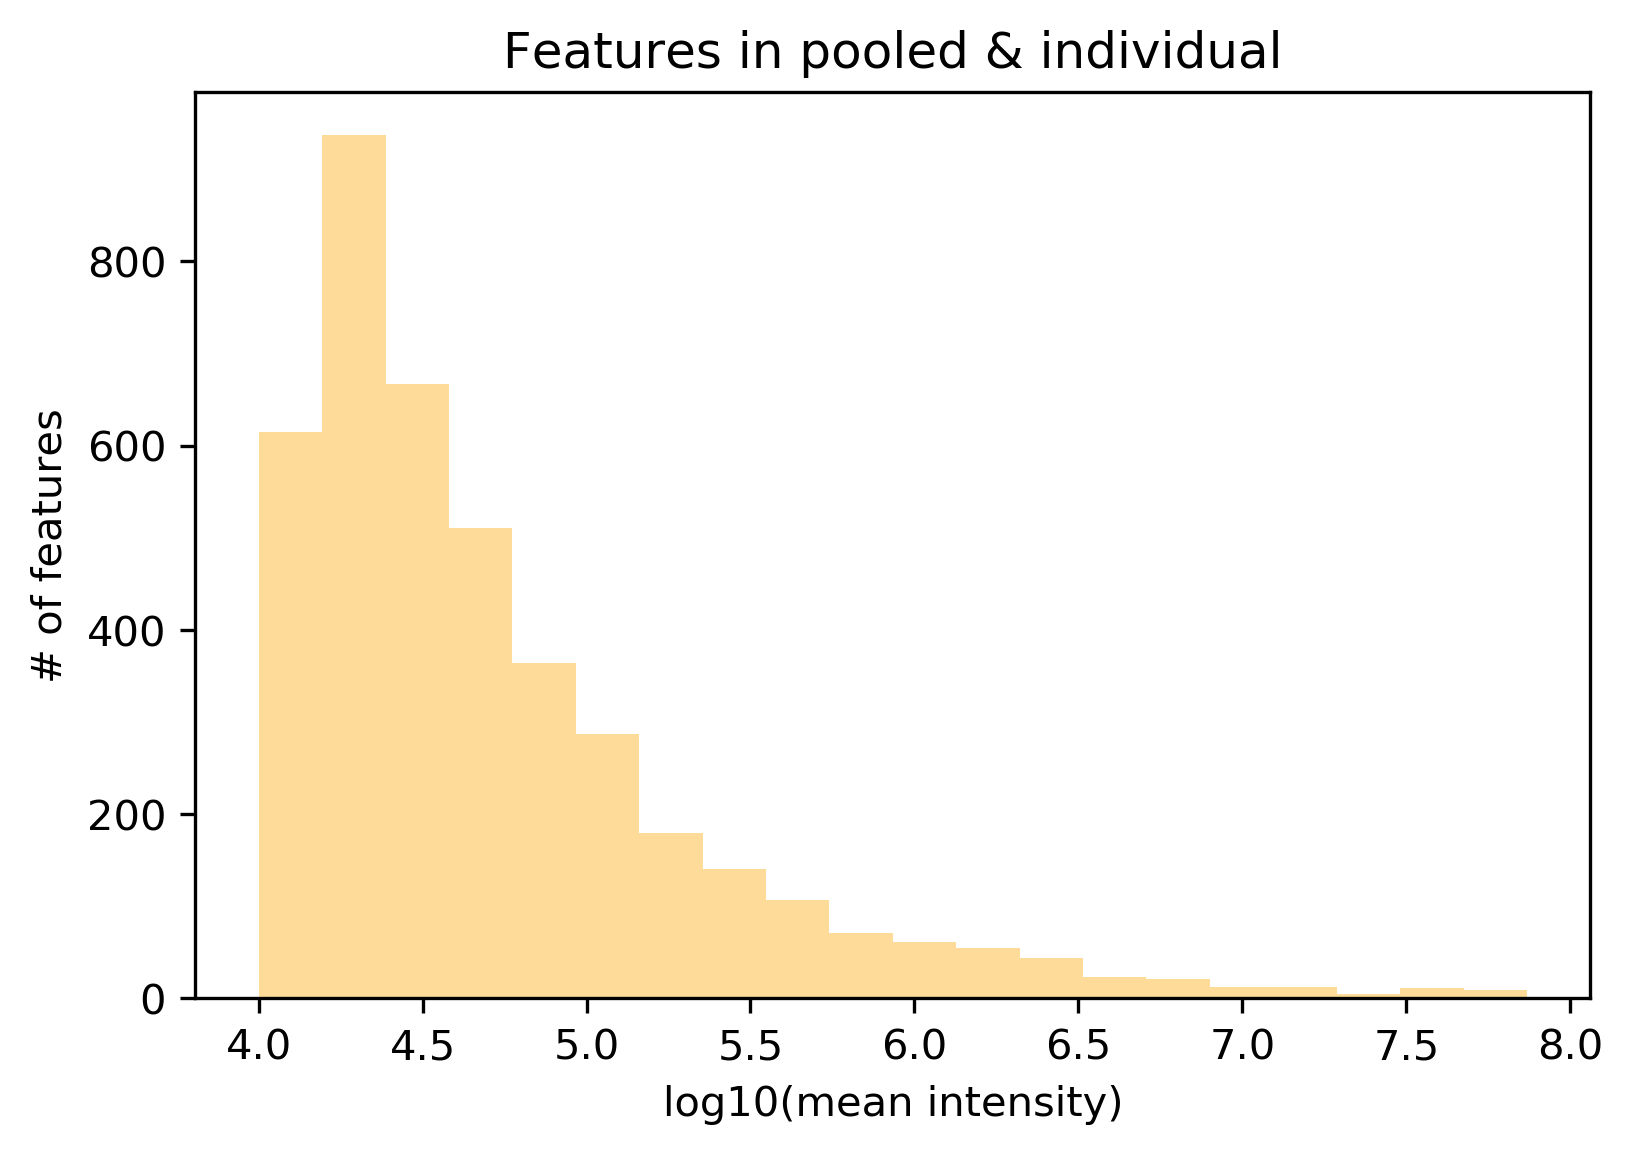

In [61]:
plt.hist(np.log10(ints),bins=20,color="orange",alpha=.4)
plt.xlabel("log10(mean intensity)")
plt.ylabel("# of features")
plt.title("Features in pooled & individual")
plt.savefig("../plots/histogram_intensity_individual_pooled.png")
print(np.mean(ints))